<a href="https://colab.research.google.com/github/shuvangiadhikari/Major-Project/blob/main/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your folder
input_folder = '/content/drive/My Drive/Major Project/Preprocessed'  # Update this to your folder's path
output_folder = '/content/drive/My Drive/Major Project/Augmented'  # Folder to save augmented images

import cv2
import os
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image loaded successfully!


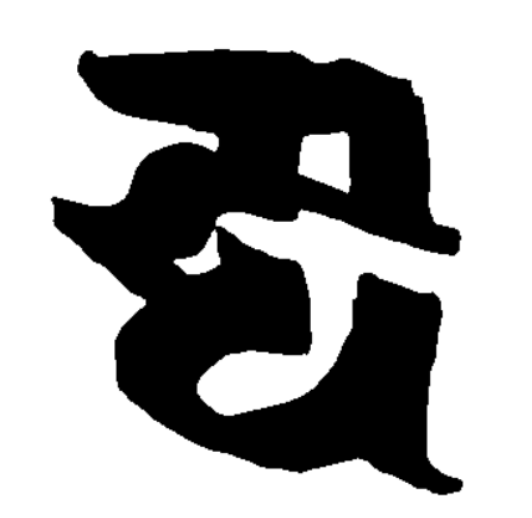

Image size: (518, 532)


In [23]:

from google.colab.patches import cv2_imshow


# Load your image
Image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/gha.png")

if Image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully!")
    cv2_imshow(image)

# Converting image to grayscale
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

size_info = Image.shape
print("Image size:", size_info)


#Function to resize image
def Resize64(image):
  resized_image = cv2.resize(image, (64, 64))
  return resized_image


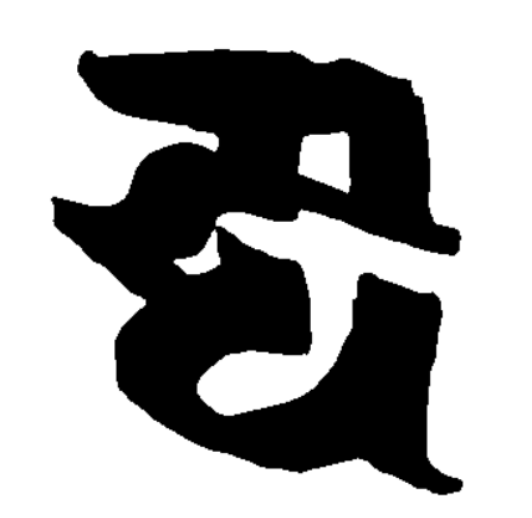

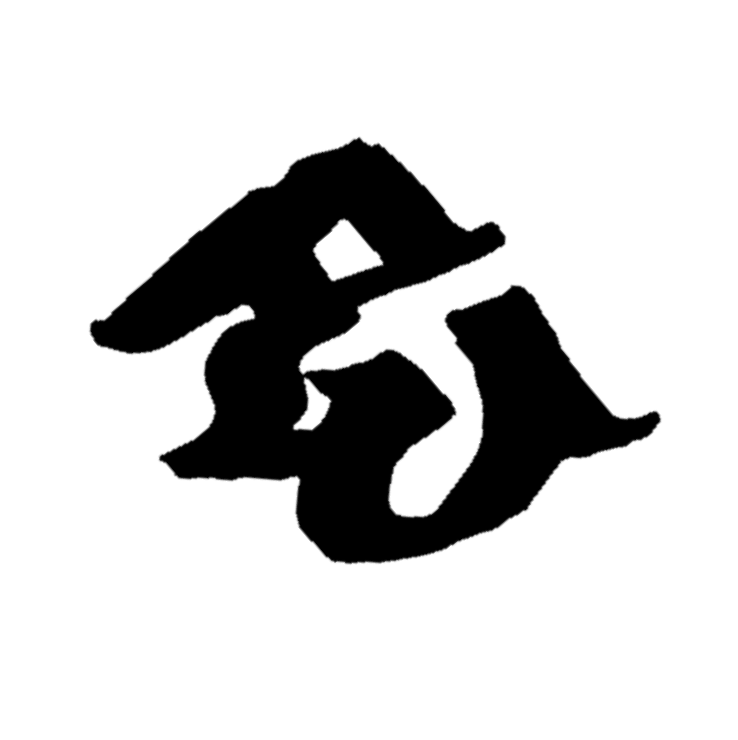

(740, 738)


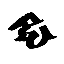

In [19]:

# Function to rotate an image without cropping/cutting sides.
def ModifiedWay(rotateImage, angle):

	# Taking image height and width
	imgHeight, imgWidth = rotateImage.shape[0], rotateImage.shape[1]

	# Computing the centre x,y coordinates
	centreY, centreX = imgHeight//2, imgWidth//2

	# Computing 2D rotation Matrix to rotate an image
	rotationMatrix = cv2.getRotationMatrix2D((centreY, centreX), angle, 1.0)

	# Taking out sin and cos values from rotationMatrix
	cosofRotationMatrix = np.abs(rotationMatrix[0][0])
	sinofRotationMatrix = np.abs(rotationMatrix[0][1])

	#Compute new height & width of image
	newImageHeight = int((imgHeight * sinofRotationMatrix) +
						(imgWidth * cosofRotationMatrix))
	newImageWidth = int((imgHeight * cosofRotationMatrix) +
						(imgWidth * sinofRotationMatrix))


	# we also need to update the values of rotation matrix
	rotationMatrix[0][2] += (newImageWidth/2) - centreX
	rotationMatrix[1][2] += (newImageHeight/2) - centreY

	# Perform actual image rotation
	rotatingimage = cv2.warpAffine(
		rotateImage, rotationMatrix, (newImageWidth, newImageHeight), borderValue=(255, 255, 255))

	return rotatingimage

Image = image

# Performing 40 degree rotation
ModifiedVersionRotation = ModifiedWay(Image, 40)

# Display image on Screen
cv2_imshow(Image)

# Display rotated image on Screen
cv2_imshow(ModifiedVersionRotation)
print (ModifiedVersionRotation.shape)

resized_and_rotated_image = Resize64(ModifiedVersionRotation)
cv2_imshow(resized_and_rotated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


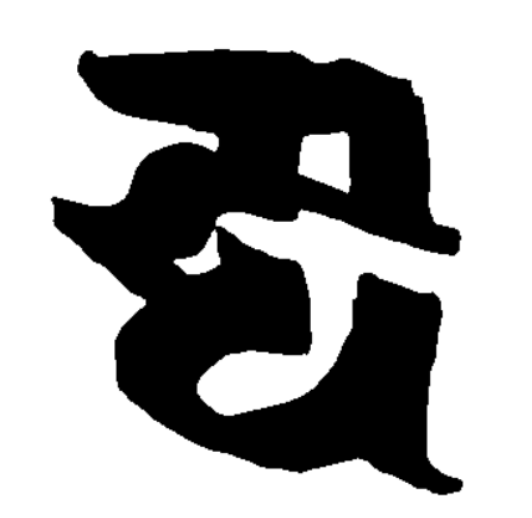

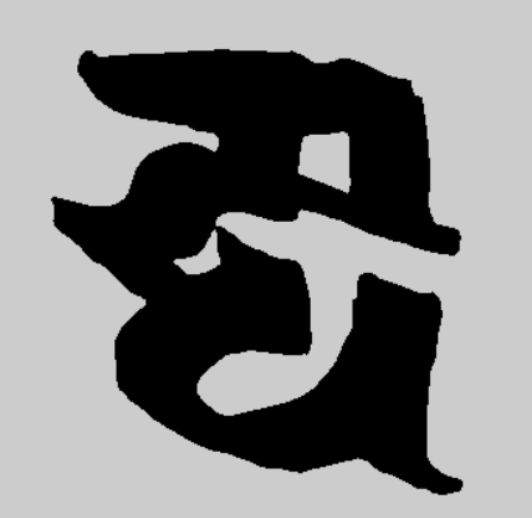

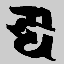

In [25]:
def adjust_brightness(image, brightness_factor):

    brightened_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

    return brightened_image


# Adjust brightness by adding 50 to the V channel
bright_image = adjust_brightness(Image, 0.8)

# Display the original and brightened images
cv2_imshow(image)
cv2_imshow(bright_image)
cv2_imshow(Resize64(bright_image))
cv2.waitKey(0)
cv2.destroyAllWindows()


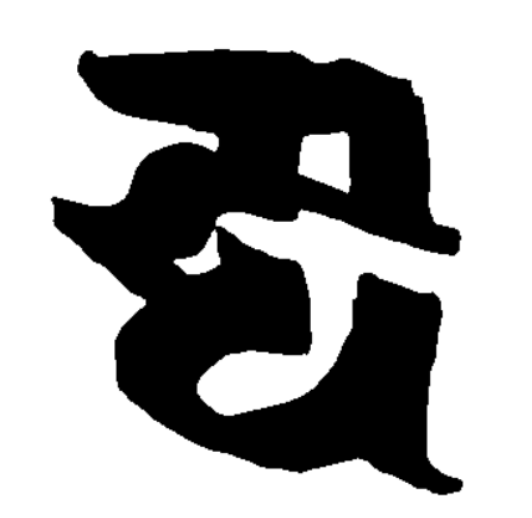

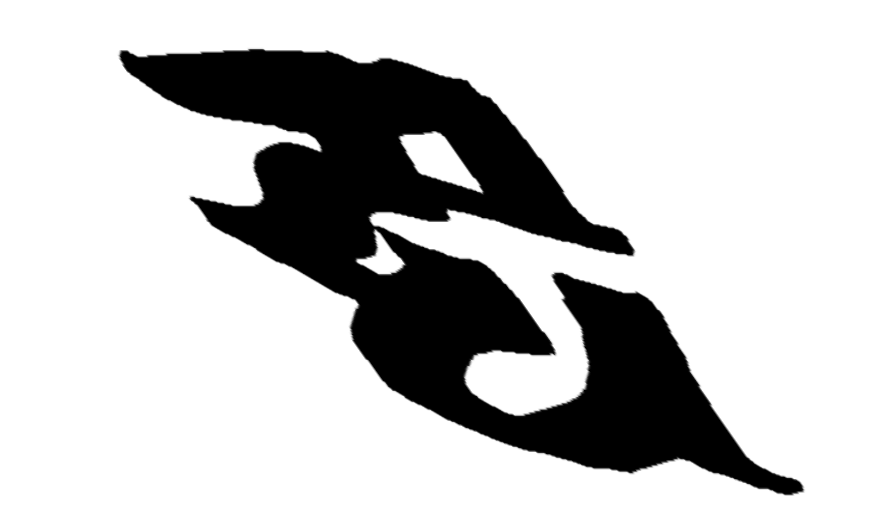

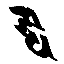

In [29]:

# Shearing Function (Compress Image)
def shear_image(image, shear_factor=0.5):

    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # Define the shear matrix
    M = np.array([
        [1, shear_factor, 0],
        [0, 1, 0]
    ], dtype=np.float32)

    # Calculate the new width after shearing
    new_width = width + abs(shear_factor * height)

    # Apply the affine transformation with the adjusted width
    sheared_image = cv2.warpAffine(
        image, M, (int(new_width), height), borderValue=(255, 255, 255)
    )

    return sheared_image

#Call the shear function
sheared_image = shear_image(Image, shear_factor=0.7)

# Display the original and sheared images
cv2_imshow(Image)
cv2_imshow(sheared_image)
cv2_imshow(Resize64(sheared_image))


cv2.waitKey(0)
cv2.destroyAllWindows()

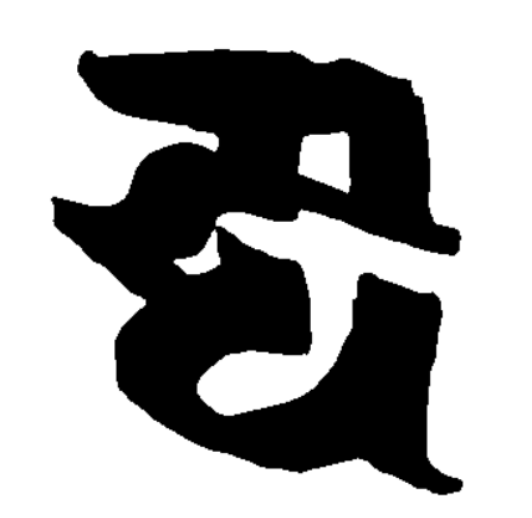

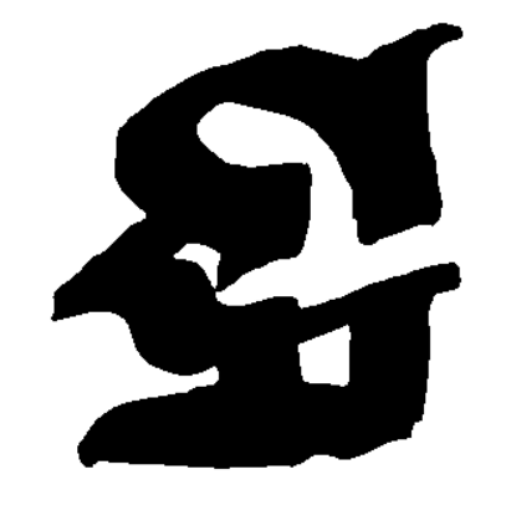

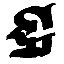

In [35]:


def flip_image(image, flip_code):


    # Flip the image based on the flip code
    flipped_image = cv2.flip(image, flip_code)

    return flipped_image

flipped_horizontally = flip_image(image, 0)

cv2_imshow(Image)
cv2_imshow(flipped_horizontally)
cv2_imshow(Resize64(flipped_horizontally))


cv2.waitKey(0)
cv2.destroyAllWindows()
